In [5]:
from FuncionesMineria2 import * 
from FuncionesMineria import *

In [61]:
#instalando librerias 
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib as plt 
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler 

<p align="center">
  <span style="font-size: 20px; color: blue;">Importación del DF Penguins</span>
</p>



In [3]:
#traer el dataframe desde seaborn 
df_pen = sns.load_dataset('penguins')
df_pen.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


<p align="center">
  <span style="font-size: 20px; color: blue;">Analisis de las variables categoricas y continuas</span>
</p>


In [4]:
#estadisticos generales de las variables numericas
df_pen.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [20]:
df_pen.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [45]:
#observamos que existen datos nulos por lo que es neceario realziar una imputacion de estos datos
#llenaremos los datos numericos con la media y los categoricos con la moda

df_pen['bill_length_mm'].fillna(df_pen['bill_length_mm'].mean(),inplace=True)
df_pen['bill_depth_mm'].fillna(df_pen['bill_depth_mm'].mean(),inplace=True)
df_pen['flipper_length_mm'].fillna(df_pen['flipper_length_mm'].mean(),inplace=True)
df_pen['body_mass_g'].fillna(df_pen['body_mass_g'].mean(),inplace=True)


# al parecer los Nan son string no son p.nan por lo que primero realizaremos el cambio
df_pen[df_pen['sex']=='NaN'] = np.nan
df_pen['sex'].fillna(df_pen['sex'].mode()[0],inplace=True)

In [46]:
df_pen.isna().sum()
#comprobamos que los valores fueron imputados correctamente

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [15]:
analizar_variables_categoricas(df_pen)

{'species':              n         %
 species                 
 Adelie     152  0.441860
 Gentoo     124  0.360465
 Chinstrap   68  0.197674,
 'island':              n         %
 island                  
 Biscoe     168  0.488372
 Dream      124  0.360465
 Torgersen   52  0.151163,
 'sex':           n         %
 sex                  
 Male    168  0.504505
 Female  165  0.495495}

De la descripcion de las varibales numricas podemos notar que, estas poseen valores correctos ya que no observamos ningun valor negativo en pesos o medidas. 
Ademas las medianas estan muy cerca a las medias por lo que podemos pre suponer una distribucion simetrica. 

para las variables categoricas vemos como hablando en porcentajes las varriables se encuentran representativamente distribuidas en cada categoria de las variables [species, island , sex]

<p align="center">
  <span style="font-size: 20px; color: blue;">Ploteo del ancho y largo del pico de los Pinguinos distingidos por Genero</span>
</p>


<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

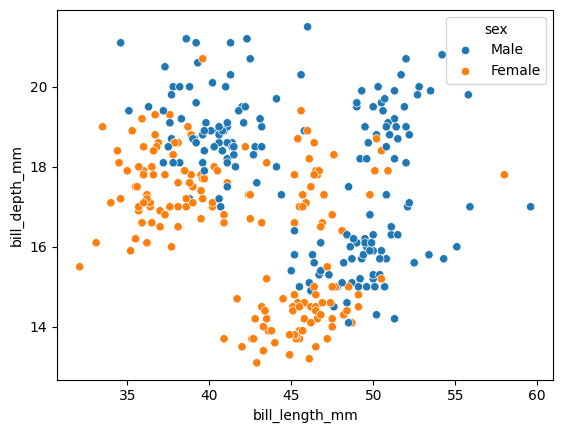

In [16]:
sns.scatterplot(data = df_pen , x= 'bill_length_mm',y ='bill_depth_mm', hue='sex')

en el grafico estamos ploteando la longitud y la profundidad de los picos de los pinguinos ademas que estan diferenciados por genero. 

donde podemos ver que si bien a simplem vista podemos decir que existen dos grupos de pinguinos distintos, existen subgrupos ya que los machos poseen dimenciones mas grandes en el pico que las mujeres. 

<p align="center">
  <span style="font-size: 20px; color: blue;">Distribucion del peso de los pinguinos por especie</span>
</p>


<Axes: xlabel='species', ylabel='body_mass_g'>

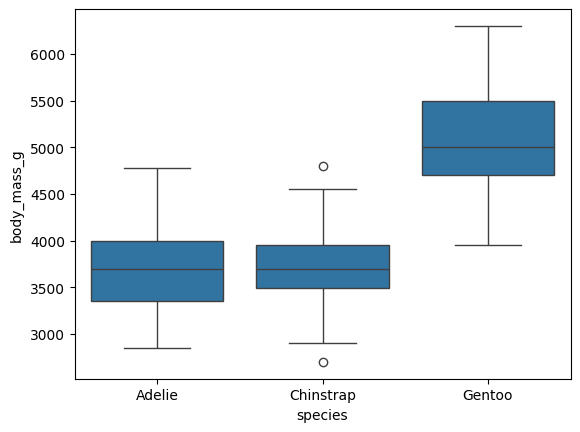

In [19]:
sns.boxplot(data = df_pen ,y='body_mass_g',x = 'species')

referente a los pesos de cada especie distinta de los pinguinos podemos ver que la especie gento esta significativamente por encima que las otras dos especias, ademas aprovechandonos del grafico de cajas podemos confirmar que effectivamente las distribuciones del peso son simetricas. 
Ademas se puede resaltar que la especia chinstrap, posee valores atipicos tanto por debajo como por debajo como por encima de los bigotes.

In [50]:
#nos quedaremos solamente con las variables numericas  para el analisi de PCA

df_pen_sex = df_pen.pop('sex') # variable que alamena el sex de los pinguinos
df_pen_island = df_pen.pop('island') # varible que almacena la isla de la cual fueron recogidos los individuos 
df_pen_species = df_pen.pop('species') #variable que alamacena la especie de los pinguinos

<p align="center">
  <span style="font-size: 20px; color: blue;">Mapa de calor para las variables numericas</span>
</p>


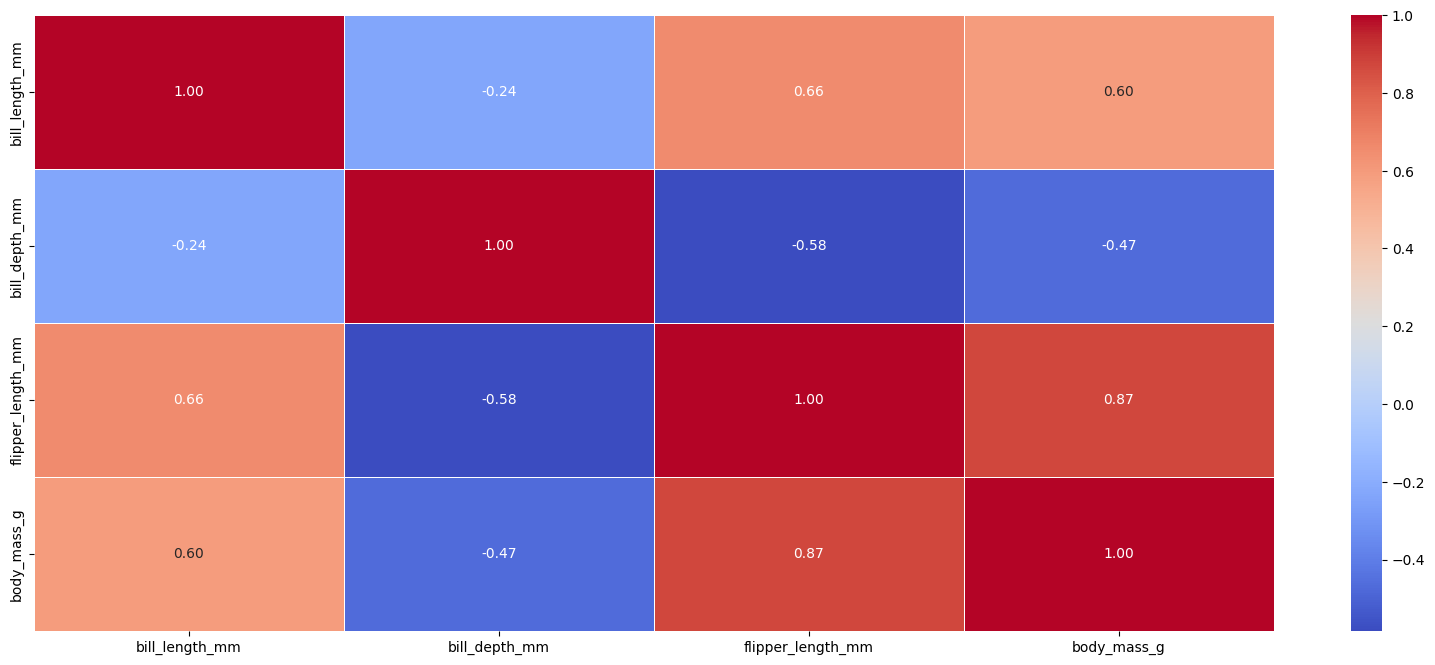

In [56]:
#calculo de la matriz de correlacion
matrix_correlacion = df_pen.corr()

#graficamos lam atriz de correlaion
plt.figure(figsize=(20,8))
sns.heatmap(data = matrix_correlacion, annot=True , cmap = 'coolwarm',fmt='.2f', linewidths=0.5)
plt.show()

1. --  Calcula la matriz de correlaciones y su representacion grafica: ¿Cuales son
 las variables mas correlacionadas de forma inversa entre las caracteristicas fisicas de los pinguinos? 

 Como podemos observar las variablesmas correlacionadas de forma inversa en los pinguinos son "flipper_length_mm" y "bill_depth_mm"
 siendo su correlacion de -0.58. lo que nos indica que a medida que la longitud de la aleta aumenta el ancho del pico disminuye.

<p align="center">
  <span style="font-size: 20px; color: blue;">Analisis PCA</span>
</p>


In [58]:
#recordemos que para poder realizar el PCA debemos tener las variables sin nullos o missing, ademas de tener los datos normalizados

variables = df_pen.columns

penguins_std = pd.DataFrame(
    StandardScaler().fit_transform(df_pen),  # Datos estandarizados
    columns=['{}_z'.format(variable) for variable in variables],  # Nombres de columnas estandarizadas
    index=df_pen.index  # Índices (etiquetas de filas) del DataFrame
)

In [63]:
#creamos una instancia de PCA para las 4 variables numericas obtenidas y alimentamos a pca.fir con nuestros datos estandarizados
pca  = PCA(n_components=4)
fit = pca.fit(penguins_std)

In [72]:
autovalores  = fit.explained_variance_  # de 4 que es la cantidad de variables vemos la cantiad que es explicada por cada autovector generado 
                                        #por el PCA

In [67]:
var_explicada = fit.explained_variance_ratio_*100 # porcentualmente que parte de la varianza del conjunto de datos esta explicado cada
                                                  # componenete principal 
var_explicada

array([68.8438781 , 19.31291885,  9.13089766,  2.7123054 ])

In [68]:
# crearemos una variable para poder ver con cuantos componentes proncuolaes podemos retener la mayor cantidad de informacion 
var_acumulada = np.cumsum(var_explicada)

In [73]:
# Crear un DataFrame de pandas con los datos anteriores y establecer índice.
data = {'Autovalores': autovalores, 'Variabilidad Explicada': var_explicada, 'Variabilidad Acumulada': var_acumulada}

tabla = pd.DataFrame(data, index=['Componente {}'.format(i) for i in range(1, fit.n_components_+1)])

In [76]:
#visualizacion de la tabla con los resultados del PCA , autovaloes, varuabilidad explicada y la acumulada.
tabla 

,Autovalores,Variabilidad Explicada,Variabilidad Acumulada
Componente 1,2.761784,68.843878,68.843878
Componente 2,0.774769,19.312919,88.156797
Componente 3,0.366301,9.130898,97.287695
Componente 4,0.108809,2.712305,100.000000


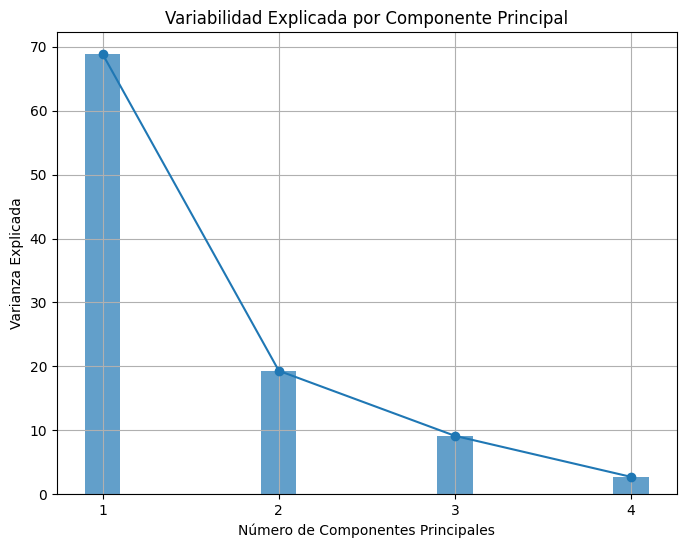

In [78]:
plot_varianza_explicada(var_explicada,fit.n_components_ )

en el grafico vemos como se explica la varianza a medida que agregamos los componentes proncipales, ademas el codo se visualiza
en el componente 2. Por lo que nuestro numero de componentes principales que tendremos sera 2 los cuales acumulan el 88.15% de la varianza de las variables.

<span style="font-size: 20px; color: orange;">ACP con dos componentes principales</span>


In [82]:
#colocando el dataset para el analisis PCA generando solo dos componentes proincipales 
pca = PCA(n_components=2)
fit = pca.fit(penguins_std)

In [83]:
autovalores = fit.explained_variance_
autovalores

array([2.76178356, 0.77476899])

In [85]:
# Obtener los autovectores asociados a cada componente principal y transponerlos.
autovectores = pd.DataFrame(pca.components_.T, 
                            columns = ['Autovector {}'.format(i) for i in range(1, fit.n_components_+1)],
                            index = ['{}_z'.format(variable) for variable in variables])
autovectores

,Autovector 1,Autovector 2
bill_length_mm_z,0.455250,0.597031
bill_depth_mm_z,-0.400335,0.797767
flipper_length_mm_z,0.576013,0.002282
body_mass_g_z,0.548350,0.084363


**CP1 = bill_length_mm_z*0.455250 + bill_depth_mm_z*-0.400335 + flipper_length_mm_z*0.576013 + body_mass_g_z*0.548350**


**CP2 = bill_length_mm_z*0.597031 + bill_depth_mm_z*0.797767 + flipper_length_mm_z*0.002282 + body_mass_g_z*0.084363**

In [88]:
# Calculamos las dos primeras componentes principales, para el dataframe. Teniendo como nacen las compoenntes principales a partir
# de los autovalores por cada elemento que interviene en las PCA.

resultados_pca = pd.DataFrame(fit.transform(penguins_std), 
                              columns=['Componente {}'.format(i) for i in range(1, fit.n_components_+1)],
                              index=penguins_std.index)

In [91]:
# Añadimos las componentes principales a la base de datos estandarizada.
peng_z_cp = pd.concat([penguins_std, resultados_pca], axis=1)
peng_z_cp.head(10)

,bill_length_mm_z,bill_depth_mm_z,flipper_length_mm_z,body_mass_g_z,Componente 1,Componente 2
0,-8.870812e-01,7.877425e-01,-1.422488,-0.565789,-1.848827e+00,4.784149e-02
1,-8.134940e-01,1.265563e-01,-1.065352,-0.503168,-1.310577e+00,-4.295989e-01
2,-6.663195e-01,4.317192e-01,-0.422507,-1.192003,-1.373179e+00,-1.549274e-01
3,-1.307172e-15,1.806927e-15,0.000000,0.000000,-1.732416e-16,1.020506e-15
4,-1.328605e+00,1.092905e+00,-0.565361,-0.941517,-1.884312e+00,-2.054387e-03
5,-8.502876e-01,1.754092e+00,-0.779643,-0.691032,-1.917329e+00,8.316307e-01
6,-9.238748e-01,3.299982e-01,-1.422488,-0.722343,-1.768173e+00,-3.525058e-01
7,-8.686844e-01,1.245487e+00,-0.422507,0.592705,-8.124398e-01,5.240142e-01
8,-1.806922e+00,4.825797e-01,-0.565361,-0.910207,-1.840563e+00,-7.718805e-01
9,-3.535738e-01,1.550650e+00,-0.779643,0.060424,-1.197694e+00,1.029280e+00


In [95]:
#almacenaremos el nombre de las columnas del df, para cuando creemos un df auciliar
variables_cp = peng_z_cp.columns

In [99]:
# Calculamos las correlaciones y seleccionamos las que nos interesan (variables contra componentes).
correlacion = pd.DataFrame(np.corrcoef(penguins_std.T, resultados_pca.T), 
                           index = variables_cp, columns = variables_cp)
correlacion

,bill_length_mm_z,bill_depth_mm_z,flipper_length_mm_z,body_mass_g_z,Componente 1,Componente 2
bill_length_mm_z,1.000000,-0.235053,0.656181,0.595110,7.554625e-01,5.247482e-01
bill_depth_mm_z,-0.235053,1.000000,-0.583851,-0.471916,-6.643331e-01,7.011804e-01
flipper_length_mm_z,0.656181,-0.583851,1.000000,0.871202,9.558620e-01,2.005893e-03
body_mass_g_z,0.595110,-0.471916,0.871202,1.000000,9.099566e-01,7.414904e-02
Componente 1,0.755463,-0.664333,0.955862,0.909957,1.000000e+00,2.769244e-16
Componente 2,0.524748,0.701180,0.002006,0.074149,2.769244e-16,1.000000e+00


In [104]:
#correlacion de las variables 
n_variables = fit.n_features_in_
correlaciones_pendf_con_cp = correlacion.iloc[:fit.n_features_in_, fit.n_features_in_:]
correlaciones_pendf_con_cp

,Componente 1,Componente 2
bill_length_mm_z,0.755463,0.524748
bill_depth_mm_z,-0.664333,0.701180
flipper_length_mm_z,0.955862,0.002006
body_mass_g_z,0.909957,0.074149


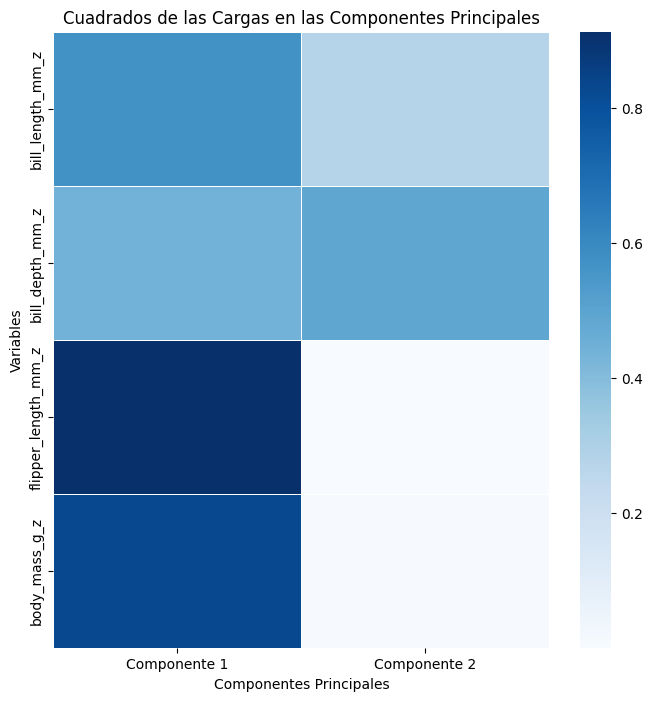

In [121]:
cos2 = correlaciones_pendf_con_cp**2
plot_cos2_heatmap(cos2)

.


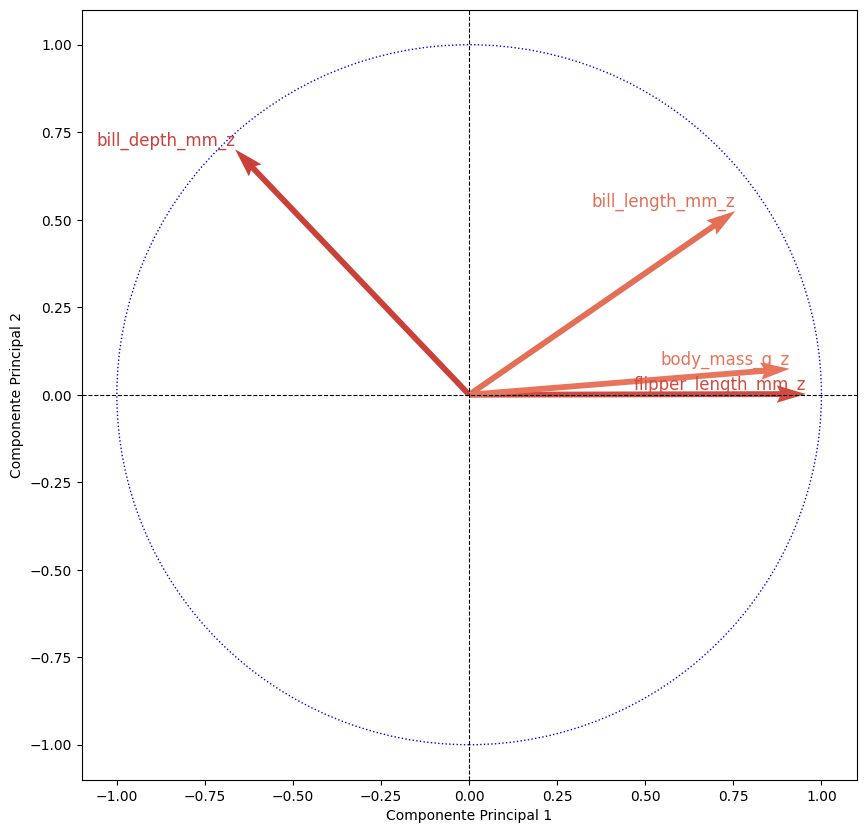

In [115]:
try:
    plot_corr_cos(fit.n_components, correlaciones_pendf_con_cp)
except ValueError :
    print(".")

Podemos mencionar que aquellos individuos que posean un alto valor del PCA1 en la direccion positiva tendran un alto valor 
BODY_MASS y FLIPPER_LENGHT 
con respecto a BILL_LENGHT queda definido mayoritariamente por el PCA1, sin embargo depende en gran cantidad del segundo.
podemos decir que BILL_DEPHT queda defnido mayoritariamnte pr el PCA2, sin embargo depende en gran cantidad del primero

Podemos ejemplificarlo diciendo que si un individuo posee un alto valor del PCA1 hacia el eje positivo este tendra una masa corporal elevada al igual que el tamaño de su aleta sera destacado 
En el caso contrario si un individuo posee un alto valor positivo del componente 2 se condice con que tendra una profundidad de pico elevada

del grfico vemos como flipper_lenght_mmz queda muy bien definido por el ComponentePrincipal1 , hacia el eje positivo 
ademas que bill_depth_mm_z queda mejor definido por el componente principal2 hacia el eje positivo 
y las variabless sobrantes proyectan su mayor cantidad de informacion en el ACP1

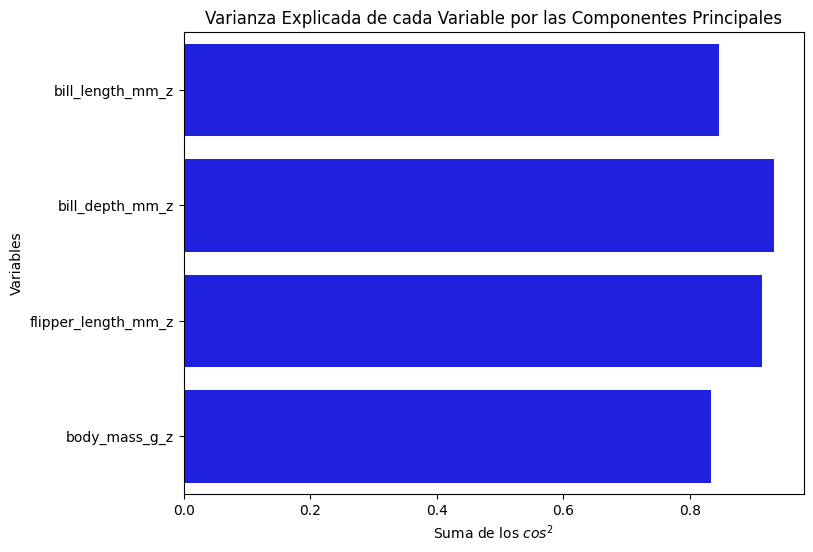

In [122]:
plot_cos2_bars(cos2)

vemos como las variables quedan explicadas por ambas componentes principales por encima de un 80%, sin embargo entiendase que la informacion de algunas queda explicada por ambas variables 
mientras que otras como bill_depth_mmz queda explicada solo por PCA1 casi en su totalidad.

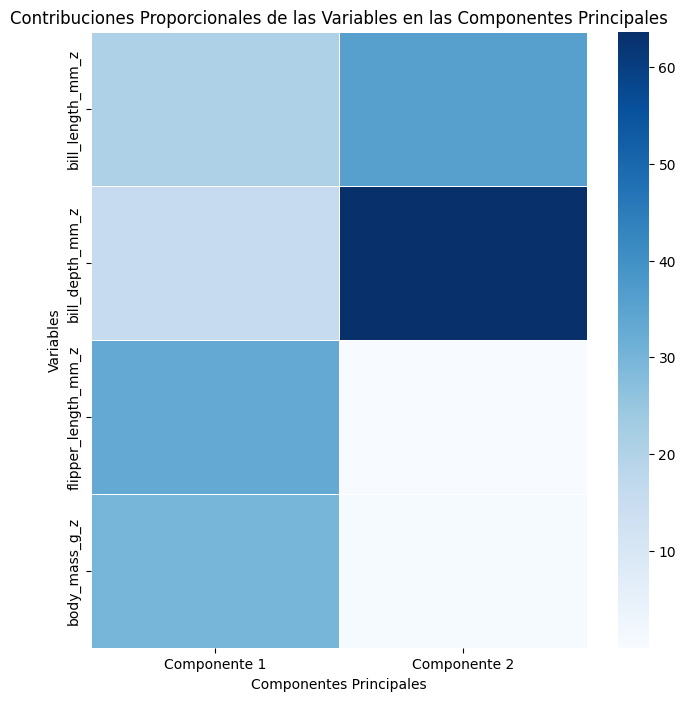

In [123]:
#xontribucion porcentual de cada variable
contribuciones_proporcionales = plot_contribuciones_proporcionales(cos2,autovalores,fit.n_components)

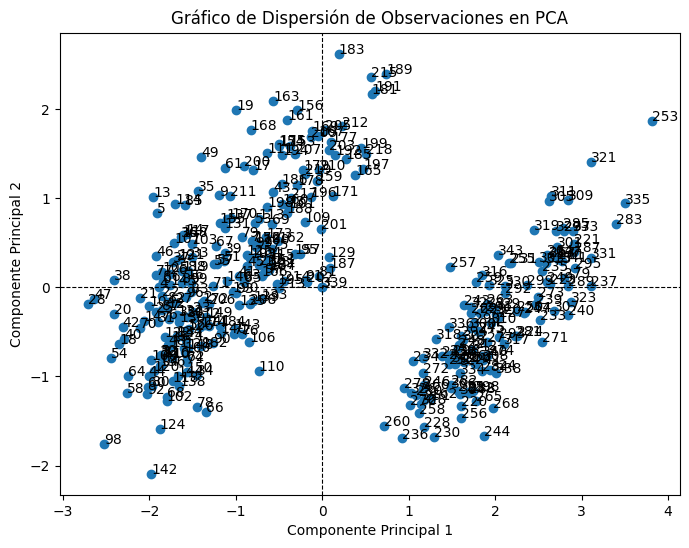

In [125]:
plot_pca_scatter(pca, penguins_std, fit.n_components)

observamos los componentes principales de cada individuo, con su etiqueta respectiva
como vemos al graficar estos componentes prioncipales estos por detras carga con la informacion de las variables.
y se desprende que existen dos grupos notorios en los pinguinos.

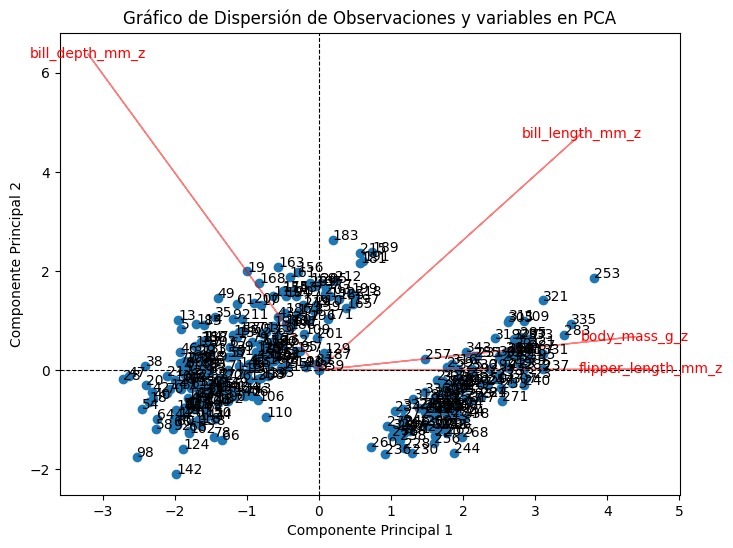

In [127]:
plot_pca_scatter_with_vectors(pca, penguins_std, fit.n_components, fit.components_)

<span style="font-size: 20px; color: orange;">Explicacion de algunos elementos</span>


como vemos los maximos que deben llaarnos la atencion son el ejemplar 19,253,183,237,231
estos al ser extremos como el 19 o 231 son etremos en la misma direccion precisa que las variables por lo que obtiene el valro maximo en 
sus respectivas variables
sin embargo el 183 o el 253 si bien no son maximos se mueven muy en el sentido de las variabkles por lo que poseen un valor muy alto
en las variables correspondeintes. 

In [169]:
#veamos los atributos del ejemplar 19 y el valor maximo que toma la varaible profundidad del pico 

print("el valor maximo que toma la var profundidad del pico es:",df_pen['bill_depth_mm'].max() )

print("---------------------------------------------------------------------------------------------------------------")
print(df_pen.iloc[[19]])
print("---------------------------------------------------------------------------------------------------------------")
print("como se espera el individuo 19 es el que destaca en la direccion del vector profundidad de pico")
print("ademas si bien no tiene los maiximos valores de las otras variables posemos decir con respecto a la direccion de las otras esta dentro del ")
print(" promedio d los valores que asumen estas variables")

el valor maximo que toma la var profundidad del pico es: 21.5
---------------------------------------------------------------------------------------------------------------
    bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
19            46.0           21.5              194.0       4200.0
---------------------------------------------------------------------------------------------------------------
como se espera el individuo 19 es el que destaca en la direccion del vector profundidad de pico
ademas si bien no tiene los maiximos valores de las otras variables posemos decir con respecto a la direccion de las otras esta dentro del 
 promedio d los valores que asumen estas variables


In [172]:
#el individuo 253 debe llamar nuestra atencion ya que despunta en varias direccinoes, por lo que se espera que tenga 
#valores proximos a los maximos en las variables de peso y longitud de pico y aleta VEAMOS: 
print("---------------------------------------------------------------------------------------------------------------")
print(print(df_pen.iloc[[253]]))
print("---------------------------------------------------------------------------------------------------------------")

print("el maximo de peso de un pinguno es:",df_pen['bill_length_mm'].max())
print("el maximo de peso de un pinguno es:",df_pen['body_mass_g'].max())
print("el maximo de peso de un pinguno es:",df_pen['flipper_length_mm'].max())

print ("\ncomo se esperaba el individuo 253 posee el valor maximo en longitud del pico, pero en peso y long. de aleta si bien ")
print("no posee valores maximos, este posee unos valores relevantemente altos, incluso en el PCA2 ak tener un valor relativamente grande")
print("tambien tiene un valor del ancho del pico elevado de 17")


---------------------------------------------------------------------------------------------------------------
     bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
253            59.6           17.0              230.0       6050.0
None
---------------------------------------------------------------------------------------------------------------
el maximo de peso de un pinguno es: 59.6
el maximo de peso de un pinguno es: 6300.0
el maximo de peso de un pinguno es: 231.0

como se esperaba el individuo 253 posee el valor maximo en longitud del pico, pero en peso y long. de aleta si bien 
no posee valores maximos, este posee unos valores relevantemente altos


**INCLUIREMOS LOS CENTROIDES DE LAS EPSECIES PARA INCREMENTAR LA INTERPRETACION DEL PCA**

In [181]:
penguin_categorico = pd.concat([penguins_std,df_pen_species],axis=1)

componentes_principales_sup=pca.transform(penguins_std)

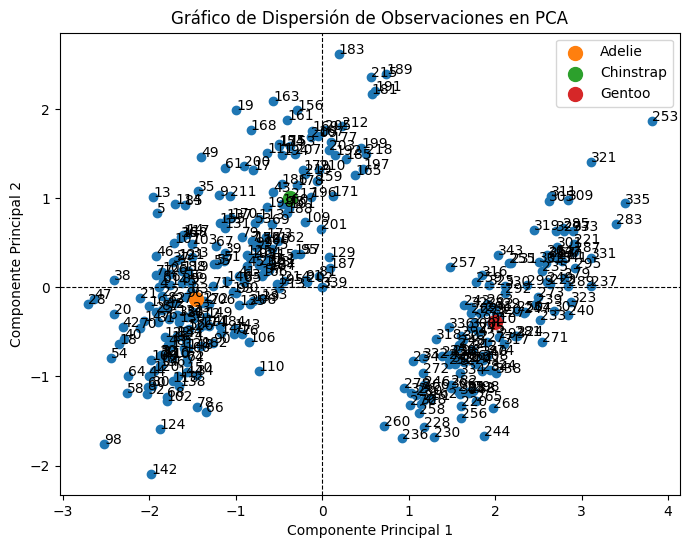

In [184]:
plot_pca_scatter_with_categories(penguin_categorico, componentes_principales_sup , fit.n_components, 'species')

como vemos incluyendo las especies de los pinguinos dentro de las observaciones nos da una idea mas precisa de los datos, ademas que las caracteristicas de cada especie que hay. 
La especie GENTO , por ejemplo poseen mayor peso longitud de aleta, longitud de pico pero en comparacion con las otras espcies un menor ancho de pico.

CHINSTRAP. posee mayor ancho en el pico a comparacion de las otras especies

y podemos mencionar que la espcie ADELINE, posee la menor longitud de pico en comparacion con las otras especies, pero mayo ancho de pico que gentoo

3.c Si tuvi´eramos que construir un ´ ındice que valore de forma conjun
ta las caracter´ ısticas f´ ısicas de un ping¨ uino, como se podr´ ıa cons
truir utilizando una combinaci´on lineal de todas las variables: ¿C´omo
 podr´ ıamos construirlo? ¿Cu´al ser´ ıa el valor de dicho ´ ındice para una
 especie de ping¨ uino representada por el conjunto de datos? Por ejem
plo, ¿cu´al ser´ ıa el valor en la especie ’Adelie’? ¿Y en la especie ’Chins
trap’?

In [193]:
peng_z_cp

,bill_length_mm_z,bill_depth_mm_z,flipper_length_mm_z,body_mass_g_z,Componente 1,Componente 2
0,-8.870812e-01,7.877425e-01,-1.422488,-0.565789,-1.848827e+00,4.784149e-02
1,-8.134940e-01,1.265563e-01,-1.065352,-0.503168,-1.310577e+00,-4.295989e-01
2,-6.663195e-01,4.317192e-01,-0.422507,-1.192003,-1.373179e+00,-1.549274e-01
3,-1.307172e-15,1.806927e-15,0.000000,0.000000,-1.732416e-16,1.020506e-15
4,-1.328605e+00,1.092905e+00,-0.565361,-0.941517,-1.884312e+00,-2.054387e-03
...,...,...,...,...,...,...
339,-1.307172e-15,1.806927e-15,0.000000,0.000000,-1.732416e-16,1.020506e-15
340,5.294731e-01,-1.450118e+00,1.006038,0.811880,1.846261e+00,-7.699555e-01
341,1.191758e+00,-7.380718e-01,1.506028,1.939064,2.768803e+00,2.897299e-01
342,2.351241e-01,-1.195816e+00,0.791756,1.250229,1.727393e+00,-7.063257e-01


In [194]:
tabla 
#recordemos que el PCA1 tiene un explicacion de 68.8438 y el PCA 2 de  19.3129

,Autovalores,Variabilidad Explicada,Variabilidad Acumulada
Componente 1,2.761784,68.843878,68.843878
Componente 2,0.774769,19.312919,88.156797
Componente 3,0.366301,9.130898,97.287695
Componente 4,0.108809,2.712305,100.000000


In [198]:
#generaremos una nueva columna que tendra los index
peng_z_cp['index'] = peng_z_cp['Componente 1']*0.6884 + peng_z_cp['Componente 2']*0.1931

peng_z_cp = pd.concat([peng_z_cp,df_pen_species],axis=1)
peng_z_cp.head(5)

,bill_length_mm_z,bill_depth_mm_z,flipper_length_mm_z,body_mass_g_z,Componente 1,Componente 2,index,species
0,-8.870812e-01,7.877425e-01,-1.422488,-0.565789,-1.848827e+00,4.784149e-02,-1.263494e+00,Adelie
1,-8.134940e-01,1.265563e-01,-1.065352,-0.503168,-1.310577e+00,-4.295989e-01,-9.851569e-01,Adelie
2,-6.663195e-01,4.317192e-01,-0.422507,-1.192003,-1.373179e+00,-1.549274e-01,-9.752126e-01,Adelie
3,-1.307172e-15,1.806927e-15,0.000000,0.000000,-1.732416e-16,1.020506e-15,7.780021e-17,Adelie
4,-1.328605e+00,1.092905e+00,-0.565361,-0.941517,-1.884312e+00,-2.054387e-03,-1.297557e+00,Adelie


In [203]:
#veamos el valor de indice para las especies 
print("el indice representativo de la especie Adelie es: ", peng_z_cp[peng_z_cp['species']=='Adelie']['index'].mean() )
print("el indice representativo de la especie Chinestrap es: ", peng_z_cp[peng_z_cp['species']=='Chinstrap']['index'].mean() )
print("el indice representativo de la especie Gentoo es: ", peng_z_cp[peng_z_cp['species']=='Gentoo']['index'].mean() )

el indice representativo de la especie Adelie es:  -1.0296103674651589
el indice representativo de la especie Chinestrap es:  -0.06660650294178502
el indice representativo de la especie Gentoo es:  1.2986291778608514
